In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [38]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define augmentation settings
# train_datagen = ImageDataGenerator(
#     rescale=1./255,  # Normalize pixel values to [0,1]
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
# # save_dir = '/kaggle/working/augmented-images'

# # # Create the save directory if it doesn't exist
# # os.makedirs(save_dir, exist_ok=True)

# train_generator = train_datagen.flow_from_directory(
#     "/kaggle/input/dataset-full/Dataset",
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical'
# )

# test_generator = test_datagen.flow_from_directory(
#     '/kaggle/input/dataset/Dataset - Test/Dataset - Test',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical'
# )


In [3]:
model = tf.keras.models.load_model("/kaggle/working/25th.h5")

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [1]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
import tensorflow as tf

import os

def process_image(image_path, IMG_SIZE=224):
    
#     if not os.path.exists(image_path) or os.path.getsize(image_path) == 0:
# #         print(f"Invalid image file: {image_path}")
#         return

    image = tf.io.read_file(image_path)
    image = tf.io.decode_image(image, channels=3, expand_animations= False)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    return image

In [8]:
images_loc = []
labels = []
for i in os.listdir("/kaggle/input/custom-ds/Dataset/Stage 0 (nofire)"):
    images_loc.append(process_image("/kaggle/input/custom-ds/Dataset/Stage 0 (nofire)"+"/"+i))
    labels.append(0)
for i in os.listdir("/kaggle/input/custom-ds/Dataset/Stage 1 (smoke)"):
    images_loc.append(process_image("/kaggle/input/custom-ds/Dataset/Stage 1 (smoke)"+"/"+i))
    labels.append(1)
for i in os.listdir("/kaggle/input/custom-ds/Dataset/Stage 2 (s+f)"):
    images_loc.append(process_image("/kaggle/input/custom-ds/Dataset/Stage 2 (s+f)"+"/"+i))
    labels.append(2)
for i in os.listdir("/kaggle/input/custom-ds/Dataset/Stage 3 (fire)"):
    images_loc.append(process_image("/kaggle/input/custom-ds/Dataset/Stage 3 (fire)"+"/"+i))
    labels.append(3)

Invalid SOS parameters for sequential JPEG


In [9]:
import numpy as np
images_loc = np.array(images_loc)
labels = np.array(labels)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(images_loc, labels, test_size=0.2, random_state = 114)

In [18]:
model.fit(x = images_loc,
         y = labels,
         epochs = 25)

Epoch 1/25
179/179 [==============================] - 9s 50ms/step - loss: 0.0177 - accuracy: 0.9956
Epoch 2/25
179/179 [==============================] - 9s 50ms/step - loss: 0.0203 - accuracy: 0.9939
Epoch 3/25
179/179 [==============================] - 9s 50ms/step - loss: 0.0162 - accuracy: 0.9948
Epoch 4/25
179/179 [==============================] - 9s 49ms/step - loss: 0.0225 - accuracy: 0.9935
Epoch 5/25
179/179 [==============================] - 9s 50ms/step - loss: 0.0170 - accuracy: 0.9953
Epoch 6/25
179/179 [==============================] - 9s 50ms/step - loss: 0.0121 - accuracy: 0.9956
Epoch 7/25
179/179 [==============================] - 9s 50ms/step - loss: 0.0320 - accuracy: 0.9888
Epoch 8/25
179/179 [==============================] - 9s 49ms/step - loss: 0.0160 - accuracy: 0.9942
Epoch 9/25
179/179 [==============================] - 9s 49ms/step - loss: 0.0194 - accuracy: 0.9953
Epoch 10/25
179/179 [==============================] - 9s 50ms/step - loss: 0.0125 - accura

In [28]:
model.save("8thNov_2nd.h5")

In [27]:
y_preds = model.predict(X_test)
preds = y_preds.argmax(axis = 1)
print(f"Accuracy", accuracy_score(np.array(preds), np.array(y_test)))

36/36 [==============================] - 1s 17ms/step
Accuracy 0.9641294838145232


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
import matplotlib.pyplot as plt
def show_25_images(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis("off")

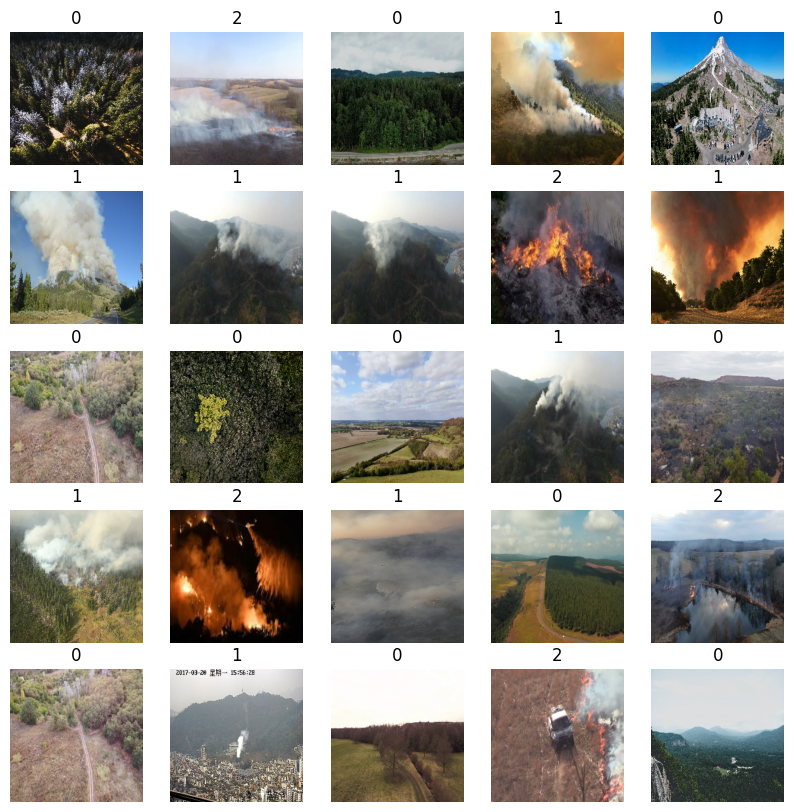

In [32]:
show_25_images(X_test, preds)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true = y_test, y_pred=preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       277
           1       0.96      0.98      0.97       284
           2       0.95      0.97      0.96       299
           3       0.99      0.92      0.95       283

    accuracy                           0.96      1143
   macro avg       0.97      0.96      0.96      1143
weighted avg       0.96      0.96      0.96      1143



In [24]:
confusion_matrix(y_true = y_test, y_pred=preds)

array([[276,   1,   0,   0],
       [  7, 277,   0,   0],
       [  1,   6, 290,   2],
       [  3,   6,  15, 259]])

Text(50.722222222222214, 0.5, 'Actual')

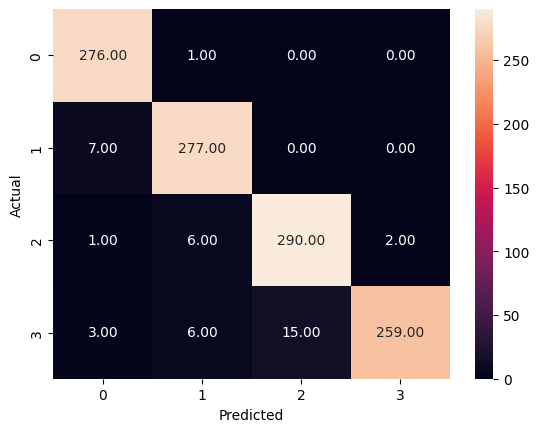

In [40]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_true = y_test, y_pred=preds), annot=True, fmt=".2f")
plt.xlabel('Predicted')
plt.ylabel('Actual')